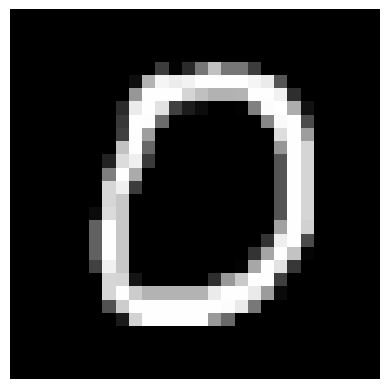

In [ ]:
import pandas as pd
from PIL import Image
import numpy as np
import os
import random
import matplotlib.pyplot as plt


csv_file = r"C:\Users\Aaditya\Desktop\ipcv_pracs\data\mnist_test.csv"  # Replace with the provided file name
data = pd.read_csv(csv_file)

labels = data.iloc[:, 0]  # First column: Labels
pixels = data.iloc[:, 1:]  # Remaining columns: Pixel data

# Directory to save images
output_dir = r"C:\Users\Aaditya\Desktop\ipcv_pracs\mnist_images"
os.makedirs(output_dir, exist_ok=True)

for idx, (label, pixel_values) in enumerate(zip(labels, pixels.values)):
    image_array = pixel_values.reshape(28, 28).astype(np.uint8)
    img = Image.fromarray(image_array)
    img.save(f"{output_dir}/{label}_{idx}.png")
    if idx >= 10: 
        break


image_files = [f for f in os.listdir(output_dir) if f.endswith(".png")]
random_image_file = random.choice(image_files)
random_image_path = os.path.join(output_dir, random_image_file)
random_img = Image.open(random_image_path)


plt.imshow(random_img, cmap="gray")
plt.axis('off')  
plt.show()




In [6]:
def erode(image_array, kernel):
    """Perform erosion on the image."""
    kernel_height, kernel_width = kernel.shape
    pad_h, pad_w = kernel_height // 2, kernel_width // 2
    padded_image = np.pad(image_array, ((pad_h, pad_h), (pad_w, pad_w)), mode="constant", constant_values=0)
    
    result = np.zeros_like(image_array)
    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            if np.all(region == kernel):  # Check if all pixels match the kernel
                result[i, j] = 255
    return result


In [7]:
def dilate(image_array, kernel):
    """Perform dilation on the image."""
    kernel_height, kernel_width = kernel.shape
    pad_h, pad_w = kernel_height // 2, kernel_width // 2
    padded_image = np.pad(image_array, ((pad_h, pad_h), (pad_w, pad_w)), mode="constant", constant_values=0)
    
    result = np.zeros_like(image_array)
    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            if np.any(region & kernel):  # Check if any pixel matches the kernel
                result[i, j] = 255
    return result


In [8]:
def opening(image_array, kernel):
    """Perform opening on the image."""
    eroded = erode(image_array, kernel)
    opened = dilate(eroded, kernel)
    return opened


In [9]:
def closing(image_array, kernel):
    """Perform closing on the image."""
    dilated = dilate(image_array, kernel)
    closed = erode(dilated, kernel)
    return closed


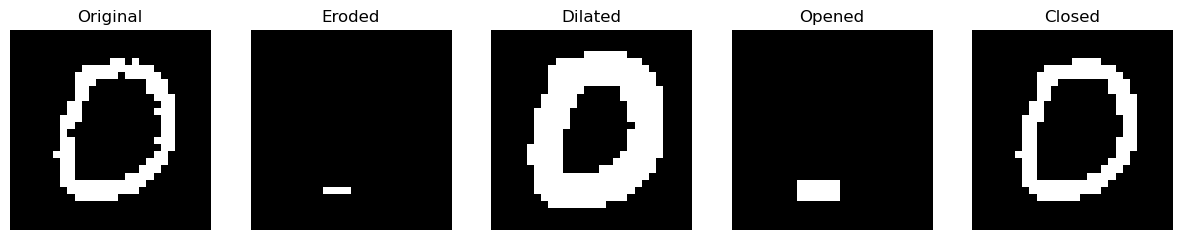

In [ ]:

binary_img = random_img.convert("1")  
binary_array = np.array(binary_img)

# Define a simple 3x3 structuring element (kernel)
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], dtype=np.uint8)

# Perform morphological operations
eroded_img = erode(binary_array, kernel)
dilated_img = dilate(binary_array, kernel)
opened_img = opening(binary_array, kernel)
closed_img = closing(binary_array, kernel)

# Display the results
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes[0].imshow(binary_array, cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(eroded_img, cmap="gray")
axes[1].set_title("Eroded")
axes[2].imshow(dilated_img, cmap="gray")
axes[2].set_title("Dilated")
axes[3].imshow(opened_img, cmap="gray")
axes[3].set_title("Opened")
axes[4].imshow(closed_img, cmap="gray")
axes[4].set_title("Closed")
for ax in axes:
    ax.axis("off")
plt.show()
